
# Исследование популярности компьютерных игр

### Данные

Исторические данные из открытых источников до 2016 года о продажах игр, оценки пользователей и экспертов, жанры и платформы. 

- name — название игры
- platform — платформа
- year_of_release — год выпуска
- gnre — жанр игры
- na_sales — продажи в Северной Америке (миллионы проданных копий)
- eu_sales — продажи в Европе (миллионы проданных копий)
- jp_sales — продажи в Японии (миллионы проданных копий)
- other_sales — продажи в других странах (миллионы проданных копий)
- critic_score — оценка критиков (максимум 100)
- user_score — оценка пользователей (максимум 10)
- rating — рейтинг от организации ESRB 

### Шаги исследования

* Откроем файл с данными и изучим общую информацию
* Предобработаем данные: переименуем столбцы, обработаем пропуски, изменим тип данных при необходимости
* Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец
* Проведем исследовательский анализ данных. Посмотрим:
        сколько игр выпускалось в разные годы
        как менялись продажи по платформам
        изучим глобальные продажи игр в разбивке по платформам
        посмотрим, как влияют на продажи отзывы пользователей и критиков
        посмотрим на общее распределение игр по жанрам, прибыльность отдельных жанров 
* Составим портрет пользователя каждого региона
* Проверим гипотезы: 
        средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
        средние пользовательские рейтинги жанров Action и Sports разные
* Напишем общий вывод

### Цели исследования

Выявить закономерности, определяющие успешность игры, чтобы интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры, мог делать ставку на потенциально популярный продукт и планировать рекламные кампании. 
Сейчас декабрь 2016, и мы планируем кампанию на 2017. Нужно отработать принцип работы с данными, чтобы можно было прогнозировать продажи хоть на 2017 год по данным 2016, хоть на 2027 — по данным 2026 года.

## Общая информация

In [1]:
# импортируем нужные нам библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\bonny\Desktop\мои_проекты_практикум\проект_5_игры\games.csv")
df.head() # выводим на экран первые 5 строк таблицы для ознакомления

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info() # получаем общую информацию о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице 16715 строк, 10 столбцов. В столбцах Name и Genre по 2 пропуска, в столбце Year_of_Release - 269 пропусков, в столбцах Critic_Score, User_Score и Rating отсутствуют примерно 40-50% значений.
Формат данных в Year_of_Release нужно будет заменить на целочисленный. В столбце User_Score должны быть числа, но формат - object, на следующем этапе нужно будет смотреть, почему.

## Предобработка данных

In [4]:
df.columns = df.columns.str.lower() # приведем названия столбцов к нижнему регистру

df = df.dropna(subset=['year_of_release', 'name', 'genre']) 
#удалим пропуски в этих столбцах - их совсем мало, их не восстановить, пусть не отвлекают

df['year_of_release'] = df['year_of_release'].astype('int32') # приведем к целочисленному формату

df['global_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] 
#добавим столбец с суммой продаж по всем регионам

In [5]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди значений в столбце user_score есть tbd - to be determined, то есть «будет определено позднее». В реальной рабочей ситуации, наверное, можно было бы обратиться к тем, кто составлял наш датасет, и уточнить, не появились ли эти данные. Но мы их восстановить не можем, то есть для нас, по сути, tbd - то же самое, что nan. Только tbd - строковое значение, из-за которого мы не можем проводить числовые операции с имеющимися оценками пользователей. Заменим tbd на nan, чтобы это можно было делать.

In [6]:
df.loc[df['user_score'] =='tbd','user_score'] = np.nan

df['user_score'] = df['user_score'].astype('float32') # приведем к числовому формату

In [7]:
df.isna().mean() #посчитаем долю пропусков по столбцам

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514534
user_score         0.546157
rating             0.405984
global_sales       0.000000
dtype: float64

0.5796706251218469


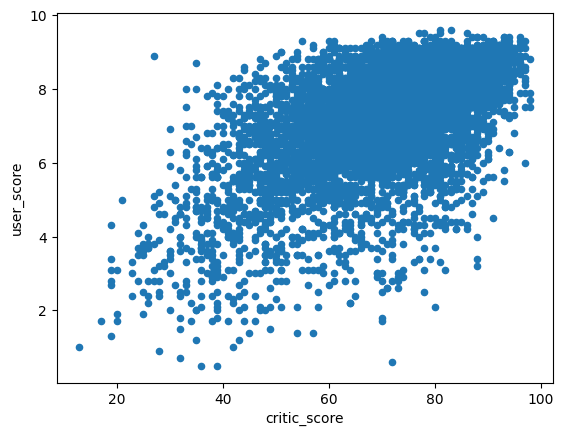

In [8]:
df.plot(x='critic_score', y='user_score', kind='scatter')
print(df['critic_score'].corr(df['user_score']))

В столбцах critic_score, user_score и rating от 40 до 55% пропусков. Заполнять их средним значением, медианой или модой кажется нецелеобразным - все-таки оценки ставятся конкретной игре, даже две игры одного жанра и года выпуска могут быть оценены очень по-разному. Зависимость между оценкой критиков и обычных игроков есть (см. гистограмму и коэф. корреляции Пирсона выше), но в отдельном случае они могут кардинально отличаться. Для точности анализа хочется работать только с точными данными, поэтому мы решили не заполнять эти пропуски. 

In [9]:
df[df['rating'].isna()]['year_of_release'].unique()

array([1985, 1996, 1989, 1984, 2005, 1999, 1990, 2006, 1988, 2002, 2010,
       1998, 2015, 2013, 2009, 2014, 1992, 1993, 2004, 1994, 1997, 2012,
       2007, 1982, 2016, 2003, 2011, 1986, 2000, 2001, 1995, 2008, 1991,
       1981, 1987, 1980, 1983])

Ассоциация ESRB, чей рейтинг представлен в столбце rating, была основана в 1994 году. Как мы видим выше, часть игр, у которых отсутствует рейтинг, была выпущена раньше. Кроме того, ESRB присваивает рейтинг только играм, выходящим в США и Канаде. Если игра не выходила на этом рынке, то и рейтинга ESRB у нее нет (на других рынках есть похожие организации, например, PEGI — европейская рейтинговая система компьютерных и видеоигр и CERO — японская рейтинговая организация). Это может объяснить часть пропусков в этом столбце. 


Остальные пропуски могли возникнуть из-за ошибки при выгрузке данных или из-за того, что в источнике, из которого брались данные для датасета, по какой-то причине не было этой информации.

In [10]:
df.duplicated().sum() # убедимся, что в таблице нет дубликатов

0

In [11]:
df = df.reset_index(drop=True) 
# переиндексируем таблицу после удаления пропусков, еще раз посмотрим общую информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float32
 10  rating           9768 non-null   object 
 11  global_sales     16444 non-null  float64
dtypes: float32(1), float64(6), int32(1), object(4)
memory usage: 1.4+ MB


Предобработка данных завершена, мы можем приступать к их анализу. 

## Исследовательский анализ данных

### Определение актуального периода

In [12]:
df['year_of_release'].value_counts() # Посмотрим, сколько игр выпускалось в разные годы

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

<AxesSubplot: >

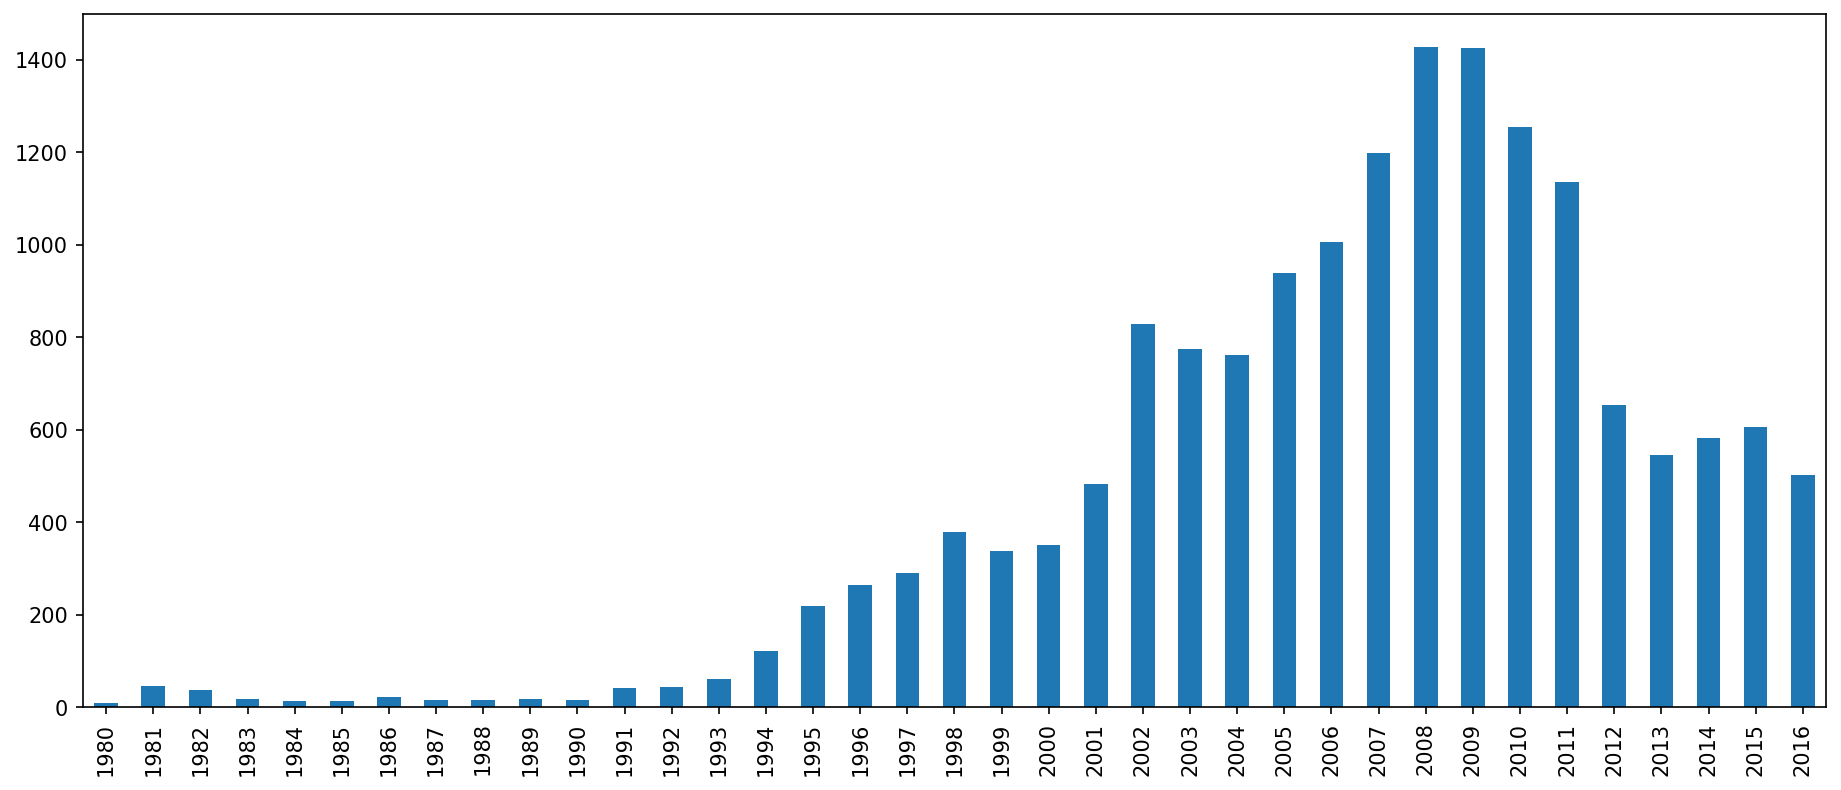

In [13]:
plt.figure(figsize=(15,6), dpi=150)
df['year_of_release'].value_counts().sort_index().plot(kind='bar')

Как мы видим, в целом с годами игр выпускается все больше, хотя эта закономерность и не совсем последовательна: больше всего игр было выпущено в 2008 году, а в таблице есть данные до 2016 года включительно. Пик выпуска игр пришелся на 2006-2011 годы.

Для дальнейшего анализа нам точно не нужны будут данные за все годы, однако, прежде чем определить актуальный период, который мы будем в дальнейшем рассматривать, посмотрим еще на популярность разных игровых платформ по годам.

In [14]:
platforms = df.pivot_table(index=['platform'], values='global_sales', aggfunc='sum')
platforms.sort_values(by='global_sales', ascending=False).head(10)
#Выберем платформы с наибольшими суммарными продажами

,global_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


<AxesSubplot: xlabel='year_of_release', ylabel='global_sales'>

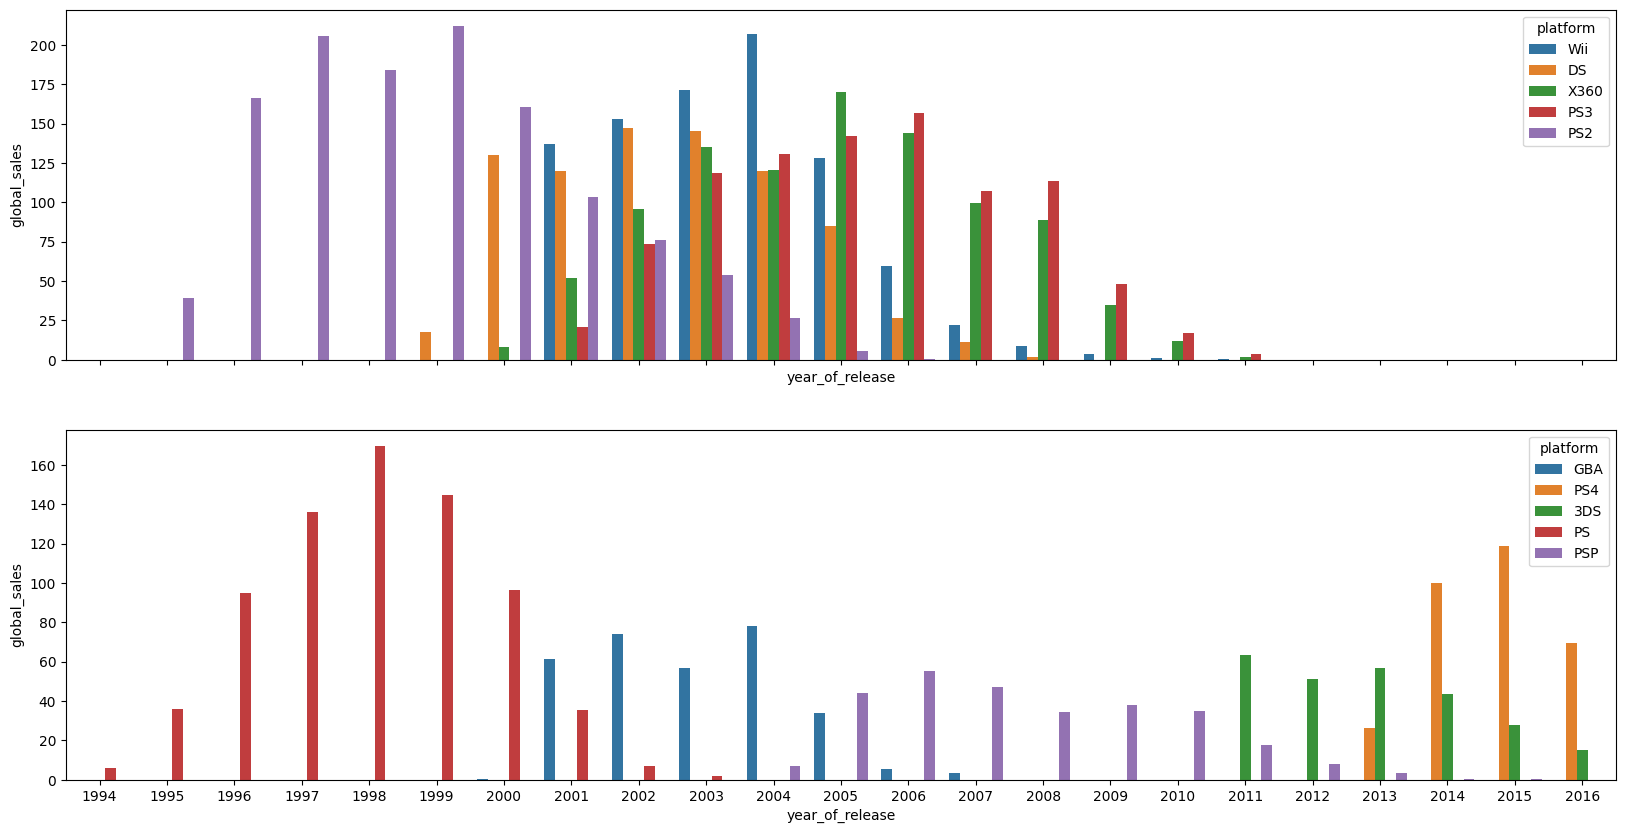

<Figure size 1500x500 with 0 Axes>

In [15]:
top_5_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS'] 
subtop_5_platforms = ['PS', 'PS4', 'GBA', 'PSP', '3DS']

rel_platforms1 = df.query('platform in @top_5_platforms') 
rel_platforms2 = df.query('platform in @subtop_5_platforms')

# создаем таблицы с данными по 10 самым популярным платформам. Делим их на 2 таблицы по 5 платформ,
# чтобы графики были более читаемыми

fig, axes = plt.subplots(2,1,figsize=(20,10), sharex=True)

sns.barplot(x='year_of_release',
            y='global_sales',
            hue="platform",
            data=rel_platforms1,
            estimator=np.sum,
            ci=None,
            ax=axes[0])

plt.figure(figsize=(15,5))
sns.barplot(x='year_of_release',
            y='global_sales',
            hue="platform",
            data=rel_platforms2,
            estimator=np.sum,
            ci=None,
            ax=axes[1]
            )

По графикам видно, что в среднем платформа «живет» около 10 лет. Об этом мы судим по платформам, игры на которых уже не продавались в 2016, чтобы быть уверенными, что они уже не используются (DS на верхнем графике - 10 лет и PS2 - 12 лет,  PS на нижнем графике - 10 лет, GBA - 8 лет, PSP - 12 лет). Чаще мы видим, что продажи начинают расти на втором году после выхода платформы и остаются высокими около 5 лет, потом начинается их постепенное снижение. Следовательно, прогнозируя будущие продажи, стоит делать ставку на игры на платформах, выпущенных 2-3 года назад, у этого сегмента самый большой потенциал. 

Для нашего дальнейшего анализа возьмем игры, выщедшие за последние 4 года, с 2012 по 2016 годы.

In [16]:
df_relevant = df.query('year_of_release in [2012, 2013, 2014, 2015, 2016]')

df_relevant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   int32  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     1312 non-null   float64
 9   user_score       1531 non-null   float32
 10  rating           1611 non-null   object 
 11  global_sales     2886 non-null   float64
dtypes: float32(1), float64(6), int32(1), object(4)
memory usage: 270.6+ KB


### Продажи по платформам

#### Прибыльность платформ

In [17]:
relevant_pivot = df_relevant.pivot_table(index=['platform'], values='global_sales', aggfunc='sum').sort_values(by='global_sales', ascending=False)
#определим, какие платформы лидируют по продажам игр

relevant_pivot

,global_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


In [18]:
df_relevant.pivot_table(index=['platform', 'year_of_release'], values='global_sales', aggfunc='sum')
# посмотрим на продажи для каждой платформы по годам, чтобы увидеть тенденции

global_sales
platform year_of_release              
3DS      2012                    51.36
         2013                    56.57
         2014                    43.76
         2015                    27.78
         2016                    15.14
DS       2012                    11.01
         2013                     1.54
PC       2012                    23.22
         2013                    12.38
         2014                    13.28
         2015                     8.52
         2016                     5.25
PS3      2012                   107.36
         2013                   113.25
         2014                    47.76
         2015                    16.82
         2016                     3.60
PS4      2013                    25.99
         2014                   100.00
         2015                   118.90
         2016                    69.25
PSP      2012                     7.69
         2013                     3.14
         2014                     0.24
         2015                     0.12
PSV      2012                    16.19
         2013                    10.59
         2014                    11.90
         2015                     6.25
         2016                     4.25
Wii      2012                    21.71
         2013                     8.59
         2014                     3.75
         2015                     1.14
         2016                     0.18
WiiU     2012                    17.56
         2013                    21.65
         2014                    22.03
         2015                    16.35
         2016                     4.60
X360     2012                    99.74
         2013                    88.58
         2014                    34.74
         2015                    11.96
         2016                     1.52
XOne     2013                    18.96
         2014                    54.07
         2015                    60.14
         2016                    26.15

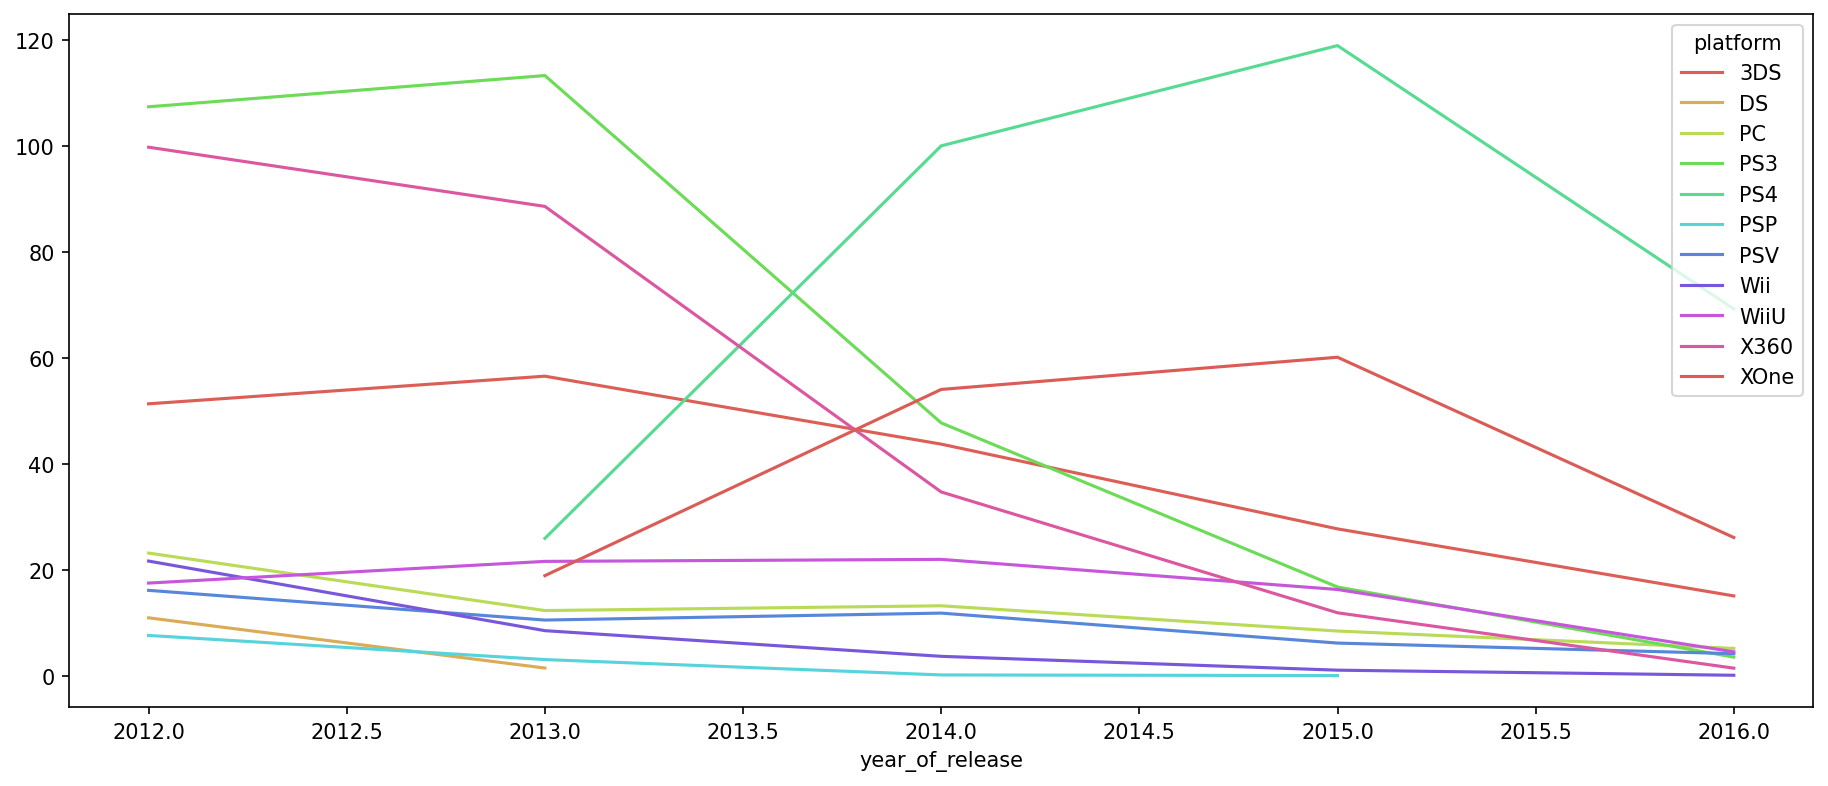

In [19]:
df_relevant.pivot_table(index='year_of_release', columns='platform', values='global_sales', aggfunc='sum').plot(figsize=(15,6),cmap=sns.color_palette('hls', as_cmap=True))
fig = plt.gcf()
fig.set_dpi(150)

Как показала таблица, за интересующий нас период продавались игры на 11 платформах. 

В первой таблице видно, что лидеры по продажам - PS4, PS3 и X360. Однако, для прогноза нас интересуют не совокупные продажи, а платформы, продажи на которых растут в последние годы. Две из трех консолей - прошлого поколения, в 2015 году они уже не так популярны (мы опираемся на данные 2015 года, т.к. нам известно, что даннные за 2016 г могут быть неполными).

В 2016 году уже не было продаж игр на платформах DS и PSР, они уходят в прошлое.
Продажи игр на платформах Wii, WiiU, X360, PS3, 3DS, PSV,  и PC в последние годы устойчиво падают, они также неперспективны.
Самые перспективные платформы - PS4 и XOne, новейшие игровые приставки двух крупнейших производителей. Они вышли недавно, в 2014 году, продажи игр на них растут, и, основываясь на выводах выше, можно предположить, что эти платформы будут популярны еще примерно 5 лет. 

#### Диаграммы размаха

Построим диаграммы размаха для совокупных продаж 5 самых популярных платформ.

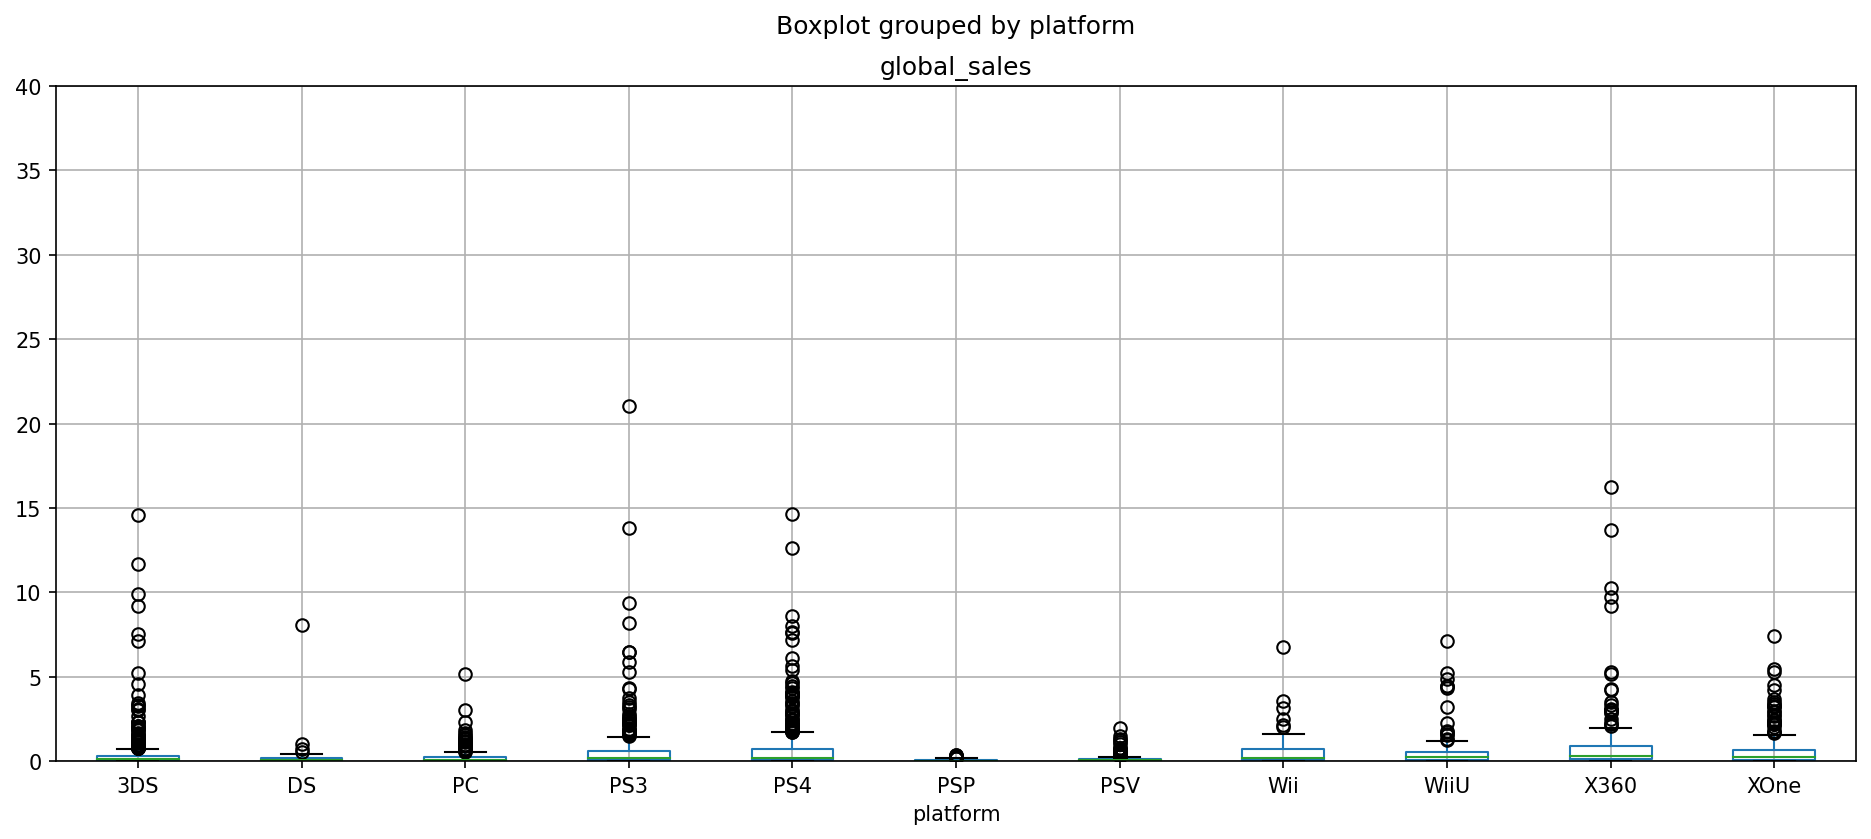

In [20]:
ax = df_relevant.boxplot(column='global_sales', by='platform', figsize=(15,6))
plt.gcf().set_dpi(150)
ax.set_ylim((0,40));

По всем 5 платформам диаграммы сильно скошены вправо - много значений лежит справа за пределами межквартильного размаха. То есть данные неоднородны, в них много выбросов.

### Взаимосвязь между продажами и отзывами

In [21]:
df_relevant[df_relevant['platform']=='PS4'][['global_sales', 'user_score', 'critic_score']].corr()

,global_sales,user_score,critic_score
global_sales,1.000000,-0.031957,0.406568
user_score,-0.031957,1.000000,0.557654
critic_score,0.406568,0.557654,1.000000


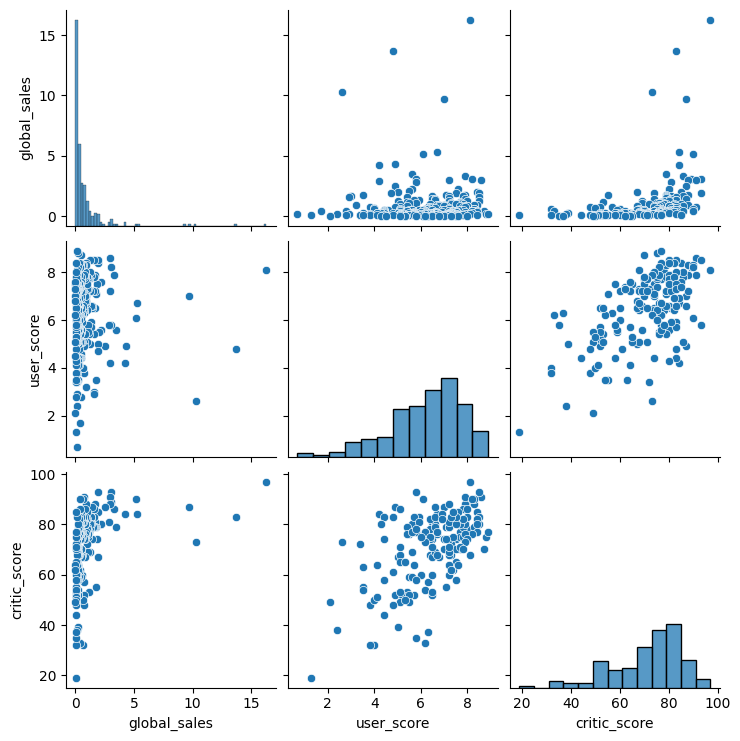

In [22]:
sns.pairplot(df_relevant[df_relevant['platform']=='X360'], vars=['global_sales', 'user_score', 'critic_score'])

Как мы видим, между продажами игр на PS4 и оценкой критиков есть положительная корреляция 0,4 - то есть зависимость не очень сильная, а между продажами и отзывами пользователей наблюдается очень слабая отрицательная корреляция - 0,03.

Проверим, какова зависимость между отзывами и продажами игр на двух других самых популярных платформах.

In [23]:
df_relevant[df_relevant['platform']=='PS3'][['global_sales', 'user_score', 'critic_score']].corr()

,global_sales,user_score,critic_score
global_sales,1.000000,-0.005144,0.331497
user_score,-0.005144,1.000000,0.539456
critic_score,0.331497,0.539456,1.000000


In [24]:
df_relevant[df_relevant['platform']=='X360'][['global_sales', 'user_score', 'critic_score']].corr()

,global_sales,user_score,critic_score
global_sales,1.000000,0.006164,0.360573
user_score,0.006164,1.000000,0.557352
critic_score,0.360573,0.557352,1.000000


Корреляция между отзывами критиков и продажами для PS3 и Х360 практически такая же, как для PS4, но для X360 нет отрицательной корреляции с оценкой пользователей. 

В целом на основании данных про трем платформам с максимальными совокупными продажами можно заключить, что оценки пользователей практически не влияют на продажи игр, оценки критиков влияют сильнее, но также не значительно.

### Распределение игр по жанрам

In [25]:
df_relevant['genre'].value_counts()

Action          1031
Role-Playing     370
Adventure        302
Sports           268
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: genre, dtype: int64

In [26]:
df_relevant.pivot_table(index='genre', values='global_sales', aggfunc='sum').sort_values(by='global_sales', ascending=False)

,global_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.07
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


In [27]:
df_relevant.pivot_table(index='genre', values='global_sales', aggfunc='median').sort_values(by='global_sales', ascending=False)

,global_sales
genre,
Shooter,0.440
Sports,0.240
Platform,0.210
Role-Playing,0.140
Racing,0.140
Fighting,0.130
Action,0.120
Misc,0.120
Simulation,0.120


Как мы видим, в таблице представлены игры 12 жанров. 

Топ-жанры по количеству выпущенных игр - Action (1031 игры), Role-Playing (370), Adventure (302). 

Лидирующие жанры по количеству проданных копий: Action	(441,1 млн копий), Shooter (304,7), Role-Playing (192,8). 

Т.к. сумма проданных копий зависит от количства игр в жанре, посмотрим дополнительно на медианное значение продаж, чтобы посмотреть, для какого жанра выше вероятность сделать успешную игру. По этому показателю лидируют Shooter (0,44), Sports (0,24) и Platform (0,21).

## Портреты пользователей каждого региона

In [28]:
# создадим датафреймы с информацией по отдельным регионам
na_stats = df_relevant[['name', 'platform', 'genre', 'na_sales', 'rating']]
eu_stats = df_relevant[['name', 'platform', 'genre', 'eu_sales', 'rating']]
jp_stats = df_relevant[['name', 'platform', 'genre', 'jp_sales', 'rating']]

### Топ-5 платформ по регионам

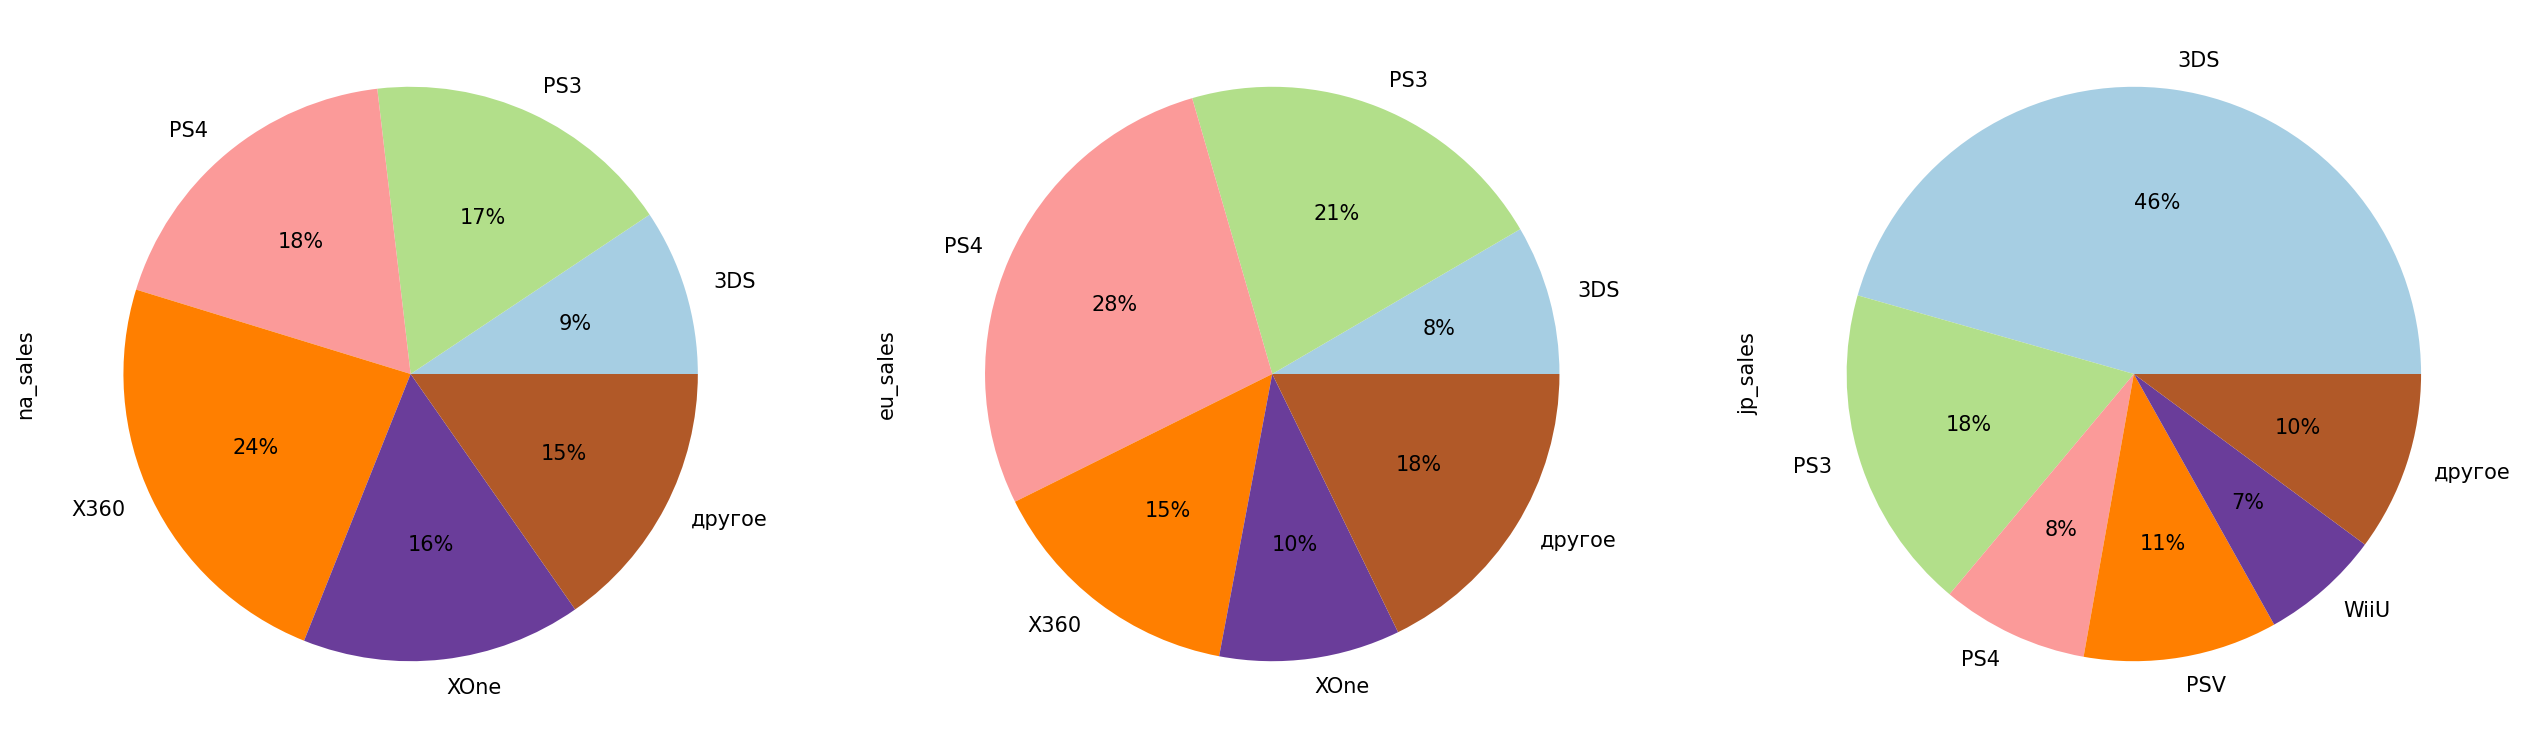

In [29]:
fig, axes = plt.subplots(1,3,figsize=(21,7), dpi=150)

for r, ax in zip(['na_sales', 'eu_sales', 'jp_sales'], axes.flat):
    data_to_plot = df_relevant.groupby('platform').agg({r : 'sum'}).reset_index().sort_values(by=r, ascending=False)
    data_to_plot.loc[~data_to_plot['platform'].isin(data_to_plot['platform'].head()), 'platform'] = 'другое'
    data_to_plot.groupby('platform').agg({r : 'sum'}).plot(kind='pie', y=r, ax=ax, autopct='%.0f%%', legend=False, cmap=sns.color_palette('Paired',as_cmap=True))

Топ-3 самых популярных платформ в Северной Америке:
X360 (24%); PS4 (18%); PS3 (17%)

Топ-3 самых популярных платформ в Европе:
PS4 (28%); PS3 (21%); X360 (15%) 

Топ-3 самых популярных платформ в Японии:
3DS (46%); PS3 (18%); PSV (11%)

Как мы видим, топ-3 платформы в Америке и Европе - одинаковые, отличаются только их доли, но незначительно. 

В Японии картина сильно отличается от Северной Америки и Европы - здесь в топ-3 две приставки, которых нет в топе двух других регионов - 3DS и PSV. Кроме того, здесь нет популярной в двух других регионах Х360 - оказалось, что японцы предпочитают исключительно приставки японских производителей. Также, портативные консоли популярнее стационарных.

### Топ-5 жанров по регионам

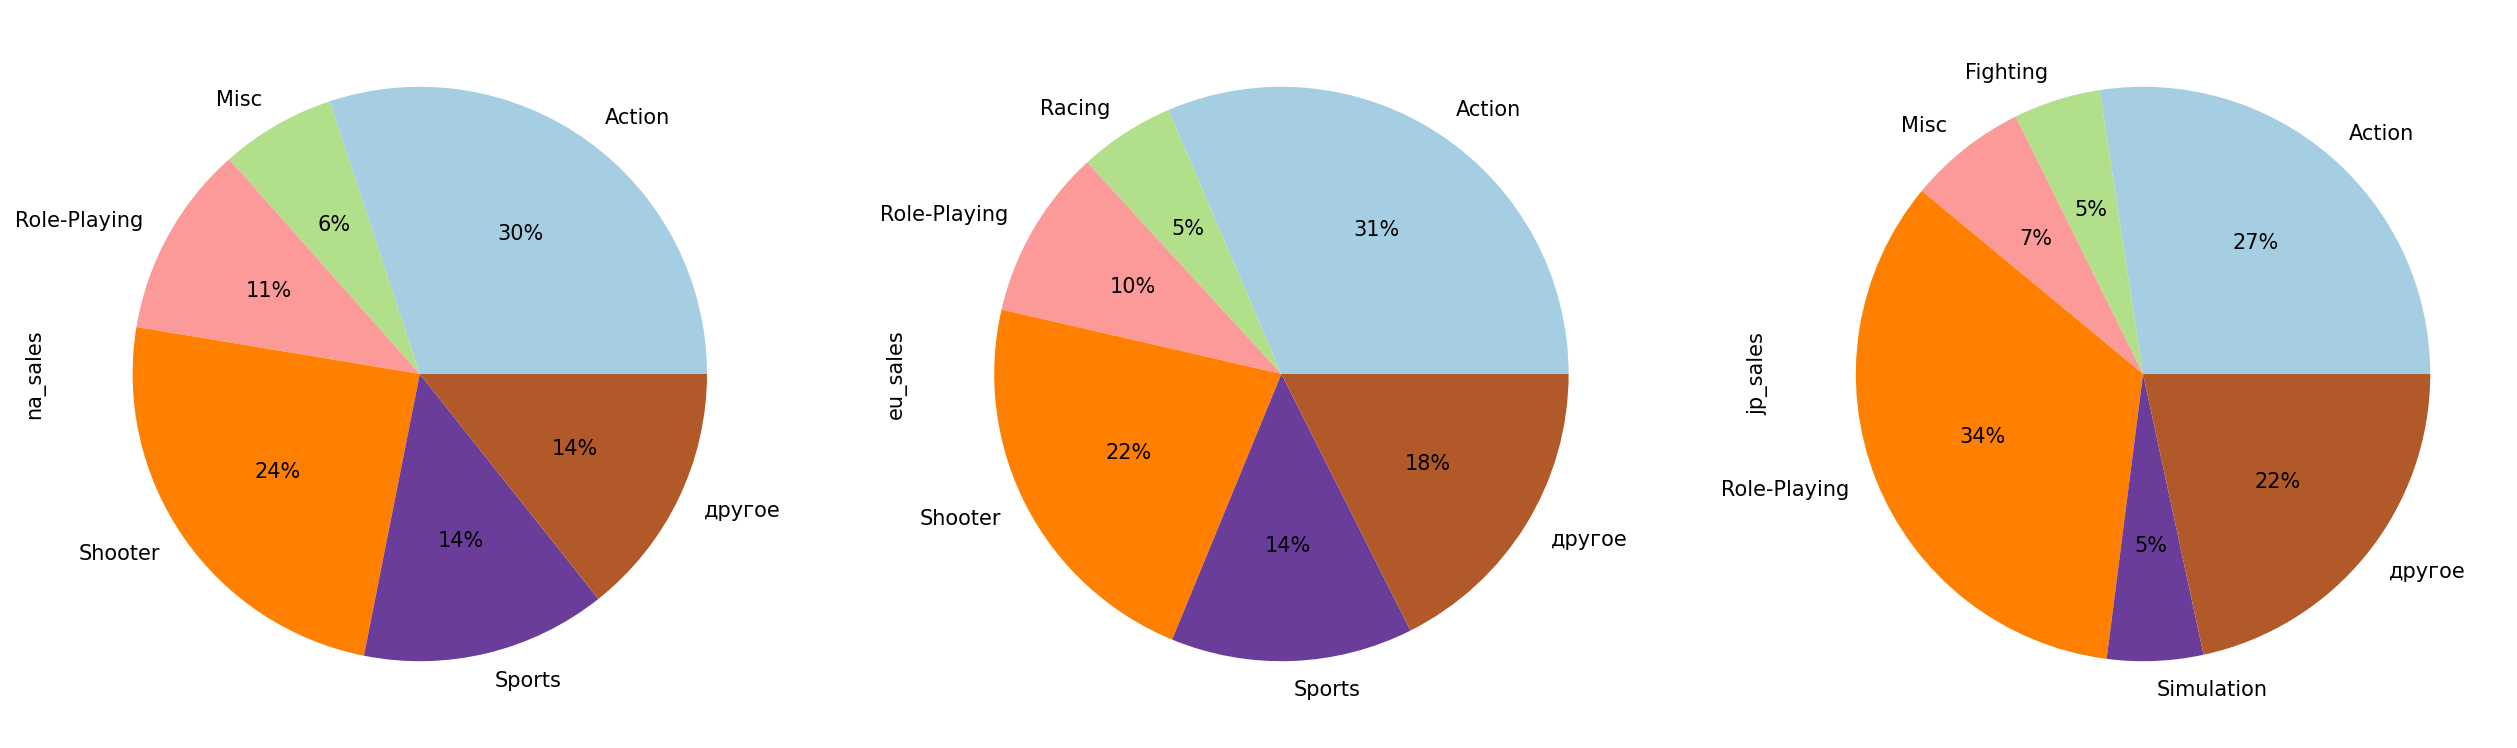

In [30]:
fig, axes = plt.subplots(1,3,figsize=(21,7), dpi=150)

for r, ax in zip(['na_sales', 'eu_sales', 'jp_sales'], axes.flat):
    data_to_plot = df_relevant.groupby('genre').agg({r : 'sum'}).reset_index().sort_values(by=r, ascending=False)
    data_to_plot.loc[~data_to_plot['genre'].isin(data_to_plot['genre'].head()), 'genre'] = 'другое'
    data_to_plot.groupby('genre').agg({r : 'sum'}).plot(kind='pie', y=r, ax=ax, autopct='%.0f%%', legend=False, cmap=sns.color_palette('Paired',as_cmap=True))

Топ-3 самых популярных жанров в Северной Америке: Action (30%), Shooter (24%), Sports (14%)

Топ-3 самых популярных жанров в Европе: Action (31%), Shooter (22%), Sports (14%)

Топ-3 самых популярных жанров в Японии: Role-Playing (34%), Action (27%), Misc (7%) 

Как и с платформами, рынки СА и Европы очень похожи с точки зрения популярных жанров: первые 3 жанра совпадают, как и их доли (практически). 

В Японии, опять же, как и с платформами, совсем другая картина. Самый популярный жанр там - ролевые игры (34% против 11% в СА и 10% в Европе).

### Влияние рейтинга ESRB на продажи по регионам

In [31]:
df_relevant['rating'] = df_relevant['rating'].fillna('no_rating')

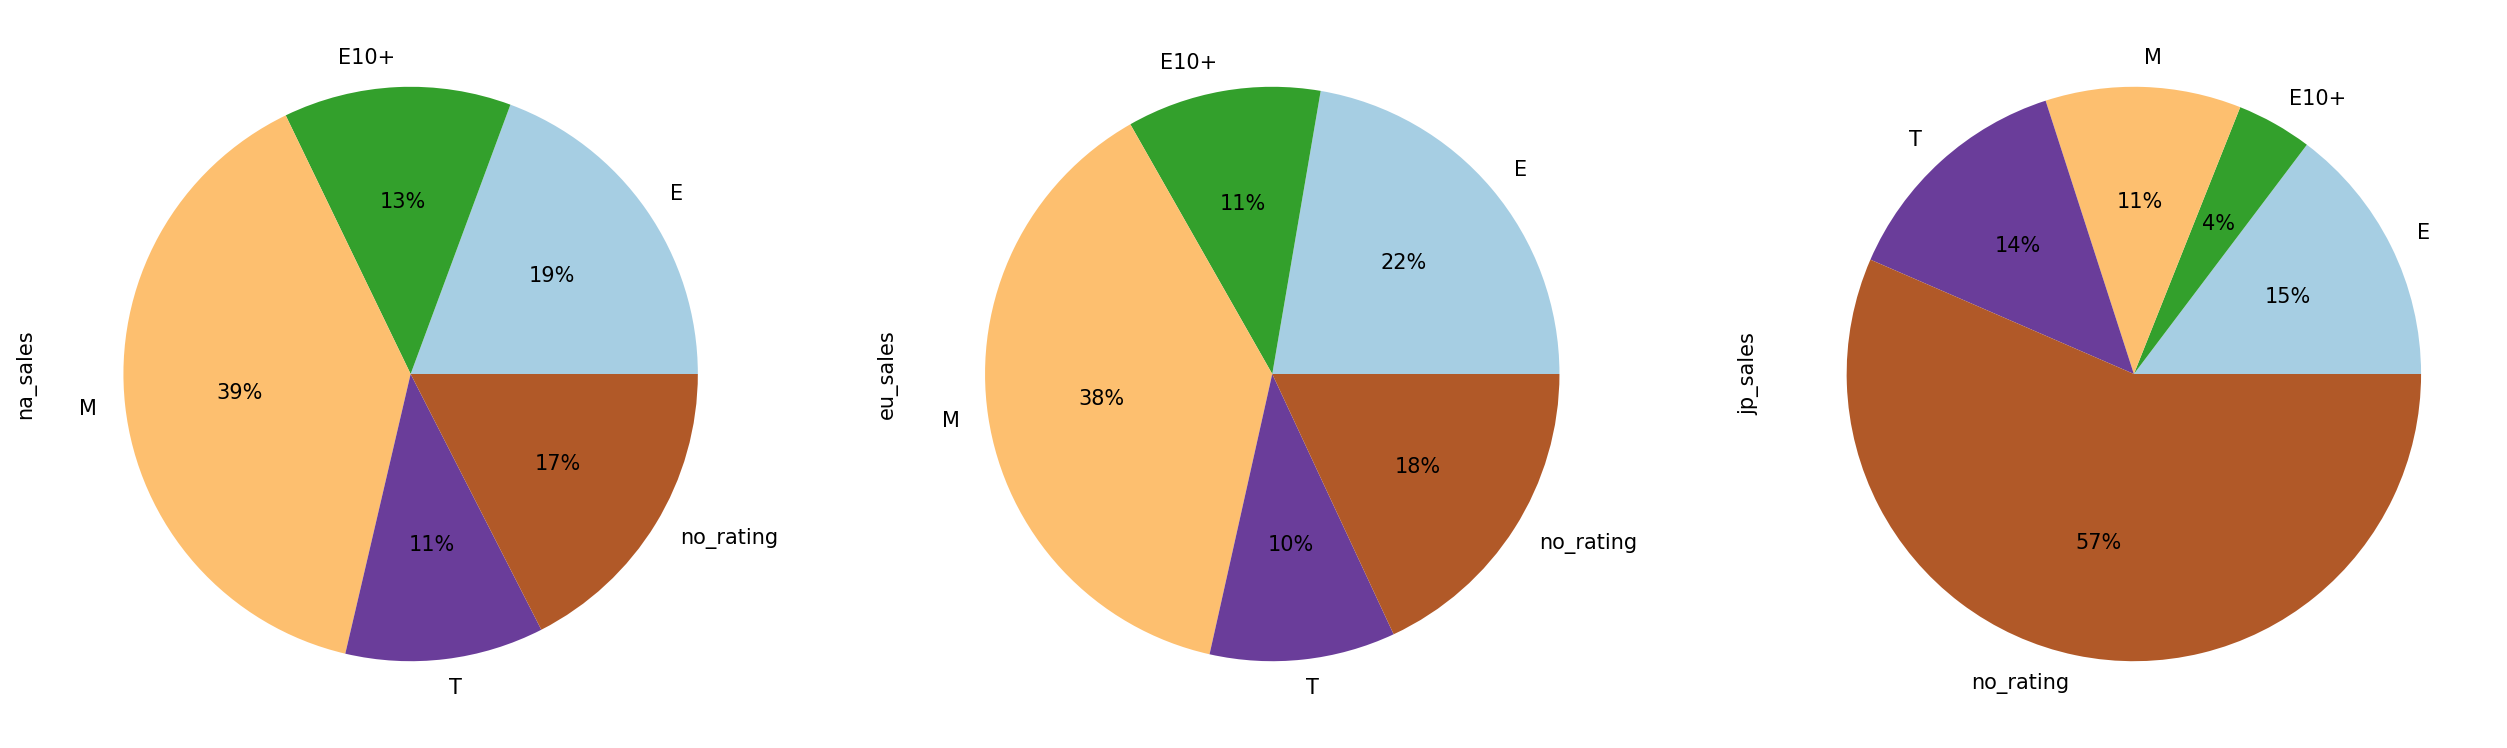

In [32]:
fig, axes = plt.subplots(1,3,figsize=(21,7), dpi=150)

for r, ax in zip(['na_sales', 'eu_sales', 'jp_sales'], axes.flat):
    data_to_plot = df_relevant.groupby('rating').agg({r : 'sum'}).reset_index().sort_values(by=r, ascending=False)
    data_to_plot.loc[~data_to_plot['rating'].isin(data_to_plot['rating'].head()), 'rating'] = 'другое'
    data_to_plot.groupby('rating').agg({r : 'sum'}).plot(kind='pie', y=r, ax=ax, autopct='%.0f%%', legend=False, cmap=sns.color_palette('Paired',as_cmap=True))

Пояснение рейтингов ESRB:
- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»

Ситуация на рынках СА и Европы одинаковая: самый популярный жанр - «М» (39% и 38% соответственно), на втором месте «Е» (19% и 22%), на третьем месте игры без рейтинга (17% и 18%). Согласно официальному сайту ESRB (esrb.org), рейтинг ESRB - добровольный. Однако в США большинство продавцов игр требуют, чтобы у игры был этот рейтинг, поэтому доля игр без рейтинга небольшая. Т.к. рынки СА и Европы очень похожи, вероятнее всего, в Европе популярны те же игры, что и в СА, поэтому там доля игр без рейтинга такая же.

В Японии самая большая группа - игры без рейтинга. ESRB - рейтинг для игр, продающихся в первую очередь в США, он не требуется в Японии, где есть свой рейтинг. А т.к. многие популярные в Японии игры продаются преимущественно на этом рынке, то у них и нет американского рейтинга. Среди игр, у которых есть рейтинг, популярны игры с рейтингом «Е» (15%), «Т» (14%) и «М» (11%).

В целом, пользователи из Северной Америки и Европы очень похожи: они чаще выбирают приставки Х360 или PS3 и PS4, играют в иргы жанров Action, Sports или Shooter и чаще японцев выберут игру для взрослых, чем для подростков.
Японцы же предпочитают портативные приставки, любят ролевые игры и чаще играют в игры, не выходившие на рынке СА.

## Проверка гипотез

In [33]:
df_relevant_pure = df_relevant.dropna()
# для статистических расчетов создадим датафрейм без пропусков

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Н_0: Средние пользовательские рейтинги ('user_score') платформы Xbox One = средние пользовательские рейтинги ('user_score') платформы PC

Н_1: Средние пользовательские рейтинги ('user_score') платформы Xbox One ≠ Средние пользовательские рейтинги ('user_score') платформы PC

In [34]:
results = st.ttest_ind(df_relevant_pure[df_relevant_pure['platform'] =='XOne']['user_score'], df_relevant_pure[df_relevant_pure['platform'] =='PC']['user_score'], equal_var=False)

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5926541248751528
Не получилось отвергнуть нулевую гипотезу


Статистический анализ имеющейся выборки не дает основания отвергнуть нулевую гипотезу. Следовательно, мы не можем заключить, что средние пользовательские рейтинги платформы Xbox One отличаются от средних пользовательских рейтингов платформы PC.

### Средние пользовательские рейтинги жанров Action и Sports разные

Н_0: Средние пользовательские рейтинги ('user_score') жанра Action = средние пользовательские рейтинги ('user_score') жанра Sports

Н_1: Средние пользовательские рейтинги ('user_score') жанра Action ≠ средние пользовательские рейтинги ('user_score') жанра Sports

In [35]:
results = st.ttest_ind(df_relevant_pure[df_relevant_pure['genre'] == 'Action']['user_score'], df_relevant_pure[df_relevant_pure['genre'] =='Sports']['user_score'], equal_var=False)

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

5.858118719459223e-14
Отвергаем нулевую гипотезу


In [36]:
print('Средний пользовательский рейтинг жанра Action:', df_relevant_pure[df_relevant_pure['genre'] == 'Action']['user_score'].mean())

print('Средний пользовательский рейтинг жанра Sports:', df_relevant_pure[df_relevant_pure['genre'] == 'Sports']['user_score'].mean())

Средний пользовательский рейтинг жанра Action: 6.8993053
Средний пользовательский рейтинг жанра Sports: 5.819858


Статистический анализ имеющейся выборки дает основания отвергнуть нулевую гипотезу. Следовательно, средние пользовательские рейтинги жанров Action и Sports отличаются друг от друга. Как мы видим, отличие составляет 1 балл.

## Вывод

Для анализа мы получили исторические данные из открытых источников о продажах 16715 игр, оценках пользователей и экспертов, жанрах и платформах с 1980 по 2016 годы. Нашей задачей было выявить закономерности, определяющие успешность игры, чтобы интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры, мог делать ставку на потенциально популярный продукт и планировать рекламные кампании. 

Мы предобработали данные: переименовали столбцы, обработали пропуски, в некоторых столбцах изменили тип данных, добавили столбец с суммарными продажами игр во всех регионах.

Мы обнаружили, пик выпуска игр пришелся на 2006-2011 годы, а каждая игровая платформа сохраняет популярность примерно 10 лет, причем пик продаж игр для одной платформы приходится чаще всего на 2-5 годы после ее выхода.

Для дальнейшего анализа мы взяли только данные по играм, выпещенным в последние 4 года.

За интересующий нас период продавались игры на 11 платформах, лидеры по совокупным продажам среди них - PS4, PS3 и X360. А платформы, продажи на которых росли в последние годы - это PS4 и XOne.

На основании данных про трем платформам с максимальными совокупными продажами (X360, PS3 и PS4) мы заключили, что оценки пользователей практически не влияют на продажи игр, оценки критиков влияют сильнее, но тоже не значительно.

В рассмотренный нами период продавались игры 12 жанров. Топ-жанры по количеству выпущенных игр - Action (1031 игры), RPG  (370), Adventure (302). При этом по медианным продажам лидируют Shooter (0.44), Sports (0.24) и Platform (0.21), т.е. игры этих жанров чаще хорошо продаются. 

Мы составили портреты пользователей трех рынков: Северной Америки (СА), Европы и Японии. 

Как показал анализ, рынки СА и Европы очень похожи и с точки зрения выбора платформы, и игр.
Наиболее популярные платформы на этих рынках - PS4, X360 и PS3. Наиболее популярные жанры: Action, Sports и Shooter. Больше всего продающийхся игр на этих рынках имеют рейтинг «М» («Для взрослых»).

Японский рынок очень сильно отличается от СА и Европы. Самые популярные платформы здесь - 3DS, PSV и PS3 - все японские, XBox на этом рынке непопулярен. Самые популярные жанры игр - Role-Playing (34% рынка) и Action. Больше половины продающихся  на этом рынке игр не имеют рейтинга  ESRB.

В ходе исследования мы также проверили две гипотезы методами статистического анализа. В результате мы выяснили, что средние пользовательские рейтинги жанров Action и Sports разные, но не смогли подтвердить, что что средние пользовательские рейтинги платформы Xbox One отличаются от средних пользовательских рейтингов платформы PC.

Общая рекомендация заказчику:

При планировании рекламных кампаний на следующий год мы рекомендуем делать одну кампанию для Северной Америки и Европы и другую - для Японии, так как предпочтения пользователей на этих рынках разные.

Для СА и Европы рекомендуем делать ставку на игры в жанре Action, Sports и Shooter с рейтингом «М» для консолей PS4 и XOne.

Для Японии рекомендуем делать ставку на игры в жанре Role-Playing и Action для консолей PS4 и, пока что, 3DS. Но когда Nintendo выпустит новую портативную приставку, стоит обратить внимание на игры для нее, т.к. продажи игр на 3DS уже падают, а анализ показывает, что японцы предпочитают портативные приставки японского производства.